# **NumPy 기본: 배열과 벡터 연산** 

### **1.5 불리언값으로 선택하기**

- 중복된 이름이 포함된 배열과 randn 함수(numpy.random모듈)를 사용해서 임의의 표준 정규 분포 데이터 생성

In [1]:
import numpy as np

names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

In [2]:
names

array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'], dtype='<U4')

In [3]:
data

array([[-0.44938981, -0.91325914, -0.06845952,  0.69101802],
       [-1.12660314, -0.00289507,  1.23285255, -0.53767106],
       [-1.29551435,  0.67507798, -0.37243128,  2.07776135],
       [-2.00379253,  0.47681884, -0.29473195, -1.06566474],
       [ 0.54389527,  1.28869887,  1.72806923, -1.11722296],
       [ 0.72500423, -1.75333786,  0.62239781, -0.80085921],
       [ 0.6524395 ,  0.44068263, -1.11332141,  0.85093286]])

    - 가정: 각각의 이름은 data 배열의 각 행에 대응
    - names를 'Bob' 문자열과 비교하여 불리언 배열을 반환

In [4]:
names=='Bob'

array([ True, False, False,  True, False, False, False])

      - 불리언 배열을 배열의 색인으로 사용
            - 불리언 배열은 반드시 색인하려는 축의 길이와 동일한 길이를 가져야함

In [5]:
data[names=='Bob']

array([[-0.44938981, -0.91325914, -0.06845952,  0.69101802],
       [-2.00379253,  0.47681884, -0.29473195, -1.06566474]])

      - names == 'Bob'인 행에서 2: 인 컬럼을 선택

In [6]:
data[names=='Bob', 2:]

array([[-0.06845952,  0.69101802],
       [-0.29473195, -1.06566474]])

In [7]:
data[names=='Bob', 3]

array([ 0.69101802, -1.06566474])

      - 'Bob' 이 아닌 요소들을 선택하려면 != 연산자를 사용하거나 ~를 사용해서 조건절을 추가

In [8]:
# != 연산자를 사용
data[names != 'Bob']

array([[-1.12660314, -0.00289507,  1.23285255, -0.53767106],
       [-1.29551435,  0.67507798, -0.37243128,  2.07776135],
       [ 0.54389527,  1.28869887,  1.72806923, -1.11722296],
       [ 0.72500423, -1.75333786,  0.62239781, -0.80085921],
       [ 0.6524395 ,  0.44068263, -1.11332141,  0.85093286]])

In [9]:
# ~ 연산자를 
data[~(names=="Bob")]
cond=names =='Bob'
data[~cond]

array([[-1.12660314, -0.00289507,  1.23285255, -0.53767106],
       [-1.29551435,  0.67507798, -0.37243128,  2.07776135],
       [ 0.54389527,  1.28869887,  1.72806923, -1.11722296],
       [ 0.72500423, -1.75333786,  0.62239781, -0.80085921],
       [ 0.6524395 ,  0.44068263, -1.11332141,  0.85093286]])

     - 세가지 이름 중에서 두 가지 이름을 선택하려면 &(and)나 |(or) 같은 논리 연산자를 사용한 여러 개의 불리언 조건을 사용

In [10]:
mask=(names=='Bob') | (names=='Will')
mask

array([ True, False,  True,  True,  True, False, False])

In [11]:
data[mask]

array([[-0.44938981, -0.91325914, -0.06845952,  0.69101802],
       [-1.29551435,  0.67507798, -0.37243128,  2.07776135],
       [-2.00379253,  0.47681884, -0.29473195, -1.06566474],
       [ 0.54389527,  1.28869887,  1.72806923, -1.11722296]])

    - 배열에 블리언 색인을 이용해서 데이터를 선택하면 반환되는 배열의 내용이 바뀌지 않더라도 항상 데이터 복사가 발생

[불리언 배열에 값을 대입]

    - data에 저장된 모든 음수를 0으로 대입 

In [12]:
data[data<0]=0
data

array([[0.        , 0.        , 0.        , 0.69101802],
       [0.        , 0.        , 1.23285255, 0.        ],
       [0.        , 0.67507798, 0.        , 2.07776135],
       [0.        , 0.47681884, 0.        , 0.        ],
       [0.54389527, 1.28869887, 1.72806923, 0.        ],
       [0.72500423, 0.        , 0.62239781, 0.        ],
       [0.6524395 , 0.44068263, 0.        , 0.85093286]])

     - 1차원 블리언 배열을 사용해서 전체 로우나 컬럼을 선택 가능

In [13]:
data[names != 'Joe']=7
data

array([[7.        , 7.        , 7.        , 7.        ],
       [0.        , 0.        , 1.23285255, 0.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [7.        , 7.        , 7.        , 7.        ],
       [0.72500423, 0.        , 0.62239781, 0.        ],
       [0.6524395 , 0.44068263, 0.        , 0.85093286]])

### **1.6 팬시 인덱싱**

**팬시 색인** : 정수 배열을 사용한 색인

-인덱싱의 한 종류

-인덱스 [ ] 안에 배열 넣기

In [14]:
arr = np.empty((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

     - 특정한 순서로 행을 선택
       -   원하는 순서가 명시된 정수가 담긴 ndarray나 리스트를 사용

In [15]:
#[]안에 list를 넣었다. [5번째 행, 4번째 행, 1번째 행, 7번째 행]. 쓰여진 순서대로 선택이 됨
#원래대로 인덱싱하면 순서대로 왔을 텐데, '순서'를 지정할 수 있음
arr[[4,3,0,6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

     - 색인으로 음수를 사용하면 끝에서부터 행을 선택

In [16]:
arr[[-3,-5,-7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

     - 다차원 배열을 사용하는 경우
       -  각각의 튜플에 대응하는 1차원 배열이 선택됨

reshape 메서드:

- numpy.arange: 반열린구간 [start, stop) 에서 step 의 크기만큼 일정하게 떨어져 있는 숫자들을 array 형태로 반환해 주는 함수


In [17]:
#0부터 31까지의 1차원 배열을 가지는데, (8,4)로 바꾸겠다
#물론 reshape할 수 있는 크기여야겠지... 인수분해를 잘 해야 된다는 것임.
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

      -행이 아니라 원소 단위로 하나하나 지정해 가져오고 싶을 때
      - (1,0), (5,3), (7, 1), (2, 2)에 대응하는 원소들을 선택
        - 배열이 차원과 상관없이 팬시 색인의 결과는 항상 1 차원

In [18]:
#[]안에 2개의 list를 넣는다.
# 팬시 색인의 결과
arr[[1,5,7,2],[0,3,1,2]]

array([ 4, 23, 29, 10])

     - 행과 열에 대응하는 사각형 모양의 값이 선택하는 방법

In [19]:
#원하는 행을 원하는 순서대로 선택
arr[[1,5,7,2]]

array([[ 4,  5,  6,  7],
       [20, 21, 22, 23],
       [28, 29, 30, 31],
       [ 8,  9, 10, 11]])

In [20]:
#모든 열을 선택함. 다만 열의 순서를 원하는 대로 지정함.
arr[:,[0,3,1,2]]

array([[ 0,  3,  1,  2],
       [ 4,  7,  5,  6],
       [ 8, 11,  9, 10],
       [12, 15, 13, 14],
       [16, 19, 17, 18],
       [20, 23, 21, 22],
       [24, 27, 25, 26],
       [28, 31, 29, 30]])

In [21]:
'''
arr[[1,5,7,2]]를 가져와서 그걸 또 [:, [0,3,1,2]]를 통해 열을 원하는 순서대로 바꾼 것.
arr[[1,5,7,2]]는 arr의 행의 순서만 바꿀 수 있는 거였는데, 
열의 순서도 같이 바꿔주고 싶으면 이런 표현으로 쓰기
'''
arr[[1,5,7,2]][:,[0,3,1,2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

- 팬시 색인은 슬라이싱과 달리 매번 새로운 배열로 복사

- 슬라이싱: 뷰. 팬시 색인: 뷰(x)

### **1.7 배열 전치와 축 바꾸기**

    - 배열 전치: 데이터를 복사하지 않고 데이터의 모양이 바뀐 뷰를 변환하는 기능
      - transpose: ndarray의 메서드
      - T: ndarray의 속성 

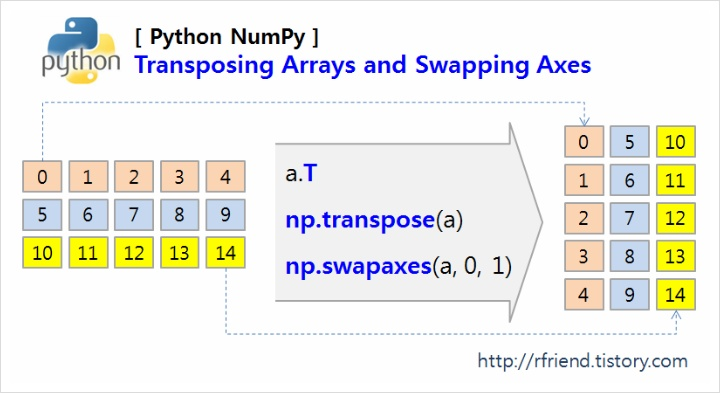

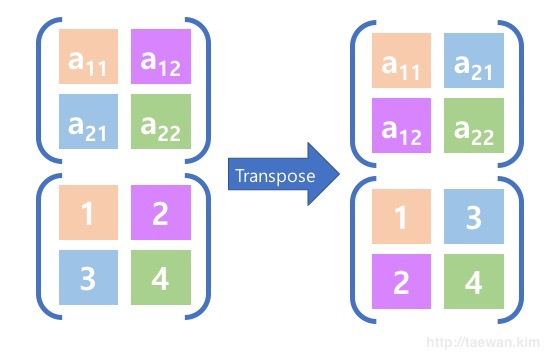

- ndarray의 속성 T 사용

In [22]:
arr = np.arange(15).reshape((3, 5))
arr

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [23]:
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

      - np.dot: 행렬의 내적 계산

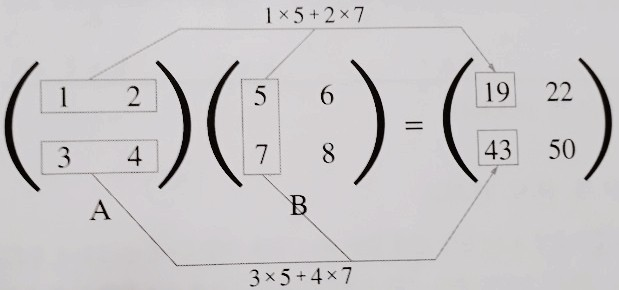

행렬의 곱셈

https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=cni1577&logNo=221754216275

In [24]:
arr = np.random.randn(6, 3)
arr

array([[ 0.50871817, -0.68217908,  0.08534628],
       [-0.14349233, -0.84329899,  0.77879495],
       [ 0.82924657, -0.60295039,  2.60496299],
       [-1.328787  ,  1.84733496, -0.48634015],
       [ 0.28909193, -1.63132507, -0.17855218],
       [-1.44174344,  0.95231378,  1.43089786]])

In [25]:
np.dot(arr.T,arr)

array([[ 4.89490728, -5.02533425,  0.62345962],
       [-5.02533425,  8.52084015, -1.53013467],
       [ 0.62345962, -1.53013467,  9.71551404]])

- transpose 메서드 사용

In [26]:
np.transpose(arr)

array([[ 0.50871817, -0.14349233,  0.82924657, -1.328787  ,  0.28909193,
        -1.44174344],
       [-0.68217908, -0.84329899, -0.60295039,  1.84733496, -1.63132507,
         0.95231378],
       [ 0.08534628,  0.77879495,  2.60496299, -0.48634015, -0.17855218,
         1.43089786]])

In [27]:
#3차원
arr = np.arange(16).reshape((2, 2, 4))
arr

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7]],

       [[ 8,  9, 10, 11],
        [12, 13, 14, 15]]])

In [29]:
#transpose((axis 1, axis 0, axis 2))
arr.transpose((1,0,2))

array([[[ 0,  1,  2,  3],
        [ 8,  9, 10, 11]],

       [[ 4,  5,  6,  7],
        [12, 13, 14, 15]]])

- swapaxes 메서드 사용

-(a,m,n): a는 어떤 배열을 바꿀 건지, (m,n)은 축을 어떻게 바꿀 건지

In [30]:
arr
#축 1, 축2를 바꾼다
arr.swapaxes(1,2)

array([[[ 0,  4],
        [ 1,  5],
        [ 2,  6],
        [ 3,  7]],

       [[ 8, 12],
        [ 9, 13],
        [10, 14],
        [11, 15]]])

### 다차원 배열 Transpose와 Reshape
http://taewan.kim/post/transpose_reshape/

[Reshape]
- 데이터의 배치 순서는 변경하지 않고 데이터를 구분하는 블록 구조를 변경하는 작업

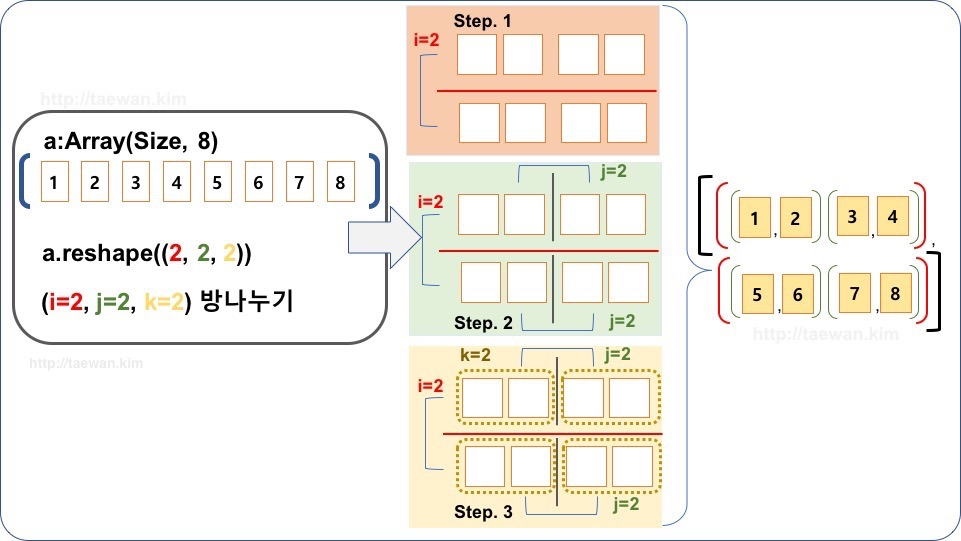

In [31]:
import numpy as np

# 1차원
a = np.arange(1,9)
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [32]:
#shape을 통해 1차원이라는 것을 알 수 있음
a.shape

(8,)

In [34]:
# Step 1: 2차원으로 만들기
#(2,4): 행과 열에 각각 몇 개가 있을 것인지 정해주기
a1=a.reshape((2,4))
a1

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [35]:
a1.shape

(2, 4)

In [36]:
# Step 2 & 3: 3차원
a2=a.reshape((2,2,2))
a2
'''
참고)차원 수 세는 법
:array를 보면 
닫힌 대괄호(']')를 만날 때까지 열린 대괄호('[')의 개수=차원 개수
'''

array([[[1, 2],
        [3, 4]],

       [[5, 6],
        [7, 8]]])

In [37]:
a2.shape

(2, 2, 2)

[Transpose]
- 행과 열을 교환하여 새로운 행렬을 얻는 것

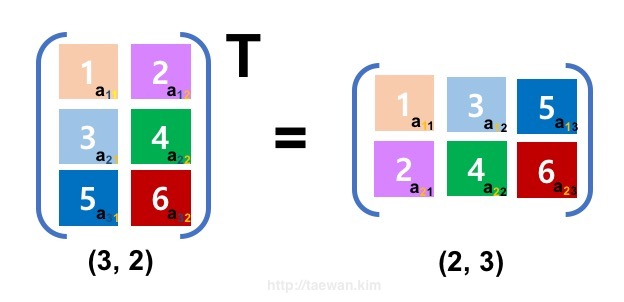

N차원 배열의 전치 : 행렬의 위치를 나타내는 인덱스 순열 중 하나의 기준으로 요소의 위치를 변경하는 일련의 과정

- 2차원 행렬의 전치의 기준이 되는 인덱스 형태: (j, i) 1개밖에 없음. (i,j)를 바꾸는 것이므로
- 3차원 행렬은 (i, j, k)를 제외하고 (i, k, j), (j, i, k), (j, k, i), (k, i, j), (k, j, i) 5개의 인덱스 형태를 기준으로 전치할 수 있음. 5가지의 선택지가 있음

In [38]:
a = np.arange(1,13)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [39]:
aaa=a.reshape((2,2,3))
print(aaa.shape)
aaa
'''
갑자기 떠올랐는데, shape을 잘 보는 방법은 /n을 보는 것 같음.
1차원은 줄넘김이 0개. (ex: [1,2,3])
2차원은 줄넘김이 1개(ex: [[1,2,3],
                          [4,5,6]])
3차원은 줄넘김이 2개(ex: [[[1,2,3],
                           [4,5,6]],
                           
                          [[7,8,9],
                           [10,11,12]]])

아니면 그냥 대괄호 개수로 보는 게 편할 수도...
'''

(2, 2, 3)


array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

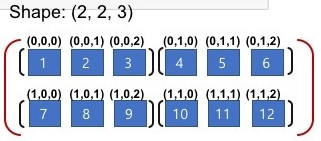

In [40]:
'''
np.transpose(어떤 배열인지, 어떤 기준인지)
2차원에서는 기준이 하나밖에 없어서 딱히 명시하지 않아도 됐었음
3차원에서는 기준 명시 필요
'''
t=np.transpose(aaa,(1,2,0))
print(t)
t.shape

[[[ 1  7]
  [ 2  8]
  [ 3  9]]

 [[ 4 10]
  [ 5 11]
  [ 6 12]]]


(2, 3, 2)

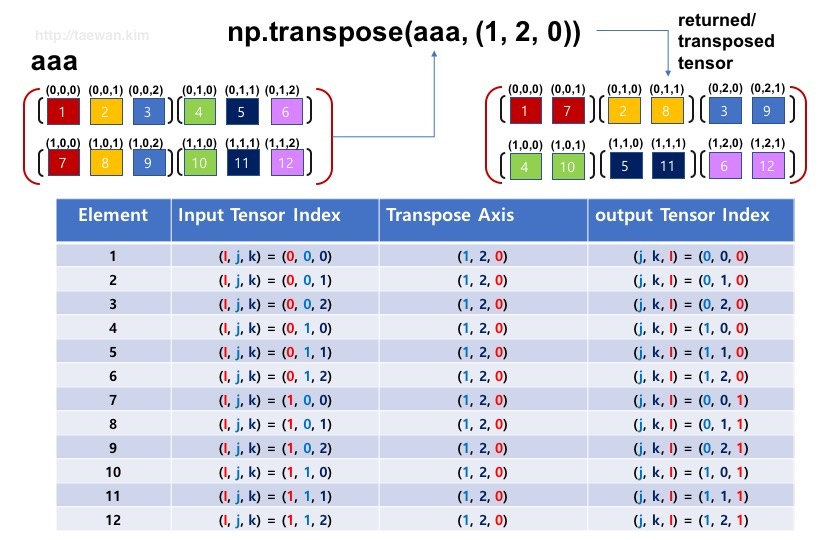

### shape: (2,3,4)인 경우

In [41]:
a = np.arange(1,25)
print(a) 

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [42]:
aaa = a.reshape((2, 3 ,4))
print(aaa)

[[[ 1  2  3  4]
  [ 5  6  7  8]
  [ 9 10 11 12]]

 [[13 14 15 16]
  [17 18 19 20]
  [21 22 23 24]]]


In [44]:
#기준 명시하지 않을 경우: default로 (a,b,c)를 (c,b,a)로 바꿈
t=np.transpose(aaa)
print(t)
t.shape

[[[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]

 [[ 4 16]
  [ 8 20]
  [12 24]]]


(4, 3, 2)

In [45]:
t=np.transpose(aaa, axes=None)
print(t)
t.shape

[[[ 1 13]
  [ 5 17]
  [ 9 21]]

 [[ 2 14]
  [ 6 18]
  [10 22]]

 [[ 3 15]
  [ 7 19]
  [11 23]]

 [[ 4 16]
  [ 8 20]
  [12 24]]]


(4, 3, 2)

In [46]:
np.transpose(aaa,axes=(0,1,2))

array([[[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]],

       [[13, 14, 15, 16],
        [17, 18, 19, 20],
        [21, 22, 23, 24]]])

In [47]:
# shape: (2, 3 ,4) -> (3, 4, 2)
np.transpose(aaa,axes=(1,2,0))

array([[[ 1, 13],
        [ 2, 14],
        [ 3, 15],
        [ 4, 16]],

       [[ 5, 17],
        [ 6, 18],
        [ 7, 19],
        [ 8, 20]],

       [[ 9, 21],
        [10, 22],
        [11, 23],
        [12, 24]]])

## **2. 유니버설 함수(범용 함수): 배열의 각 원소를 빠르게 처리하는 함수**

- ufunc: 유니버설 함수, ndarray 안에 있는 데이터 원소별로 연산을 수행하는 함수
  - 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결괏값을 반환하는 함수

     - sqrt, exp: 단항 유니버설 함수(하나의 값만을 필요로 함), 간단한 변형을 전체 원소에 적용

     -결과적으로 하나의 배열을 내놓음

In [48]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [49]:
np.sqrt(arr)

array([0.        , 1.        , 1.41421356, 1.73205081, 2.        ,
       2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ])

In [50]:
np.exp(arr)

array([1.00000000e+00, 2.71828183e+00, 7.38905610e+00, 2.00855369e+01,
       5.45981500e+01, 1.48413159e+02, 4.03428793e+02, 1.09663316e+03,
       2.98095799e+03, 8.10308393e+03])

       - add, maximum: 이항 유니버설 함수, 2개의 인자를 취해서 단일 배열을 반환

       -결과적으로 하나의 배열을 내놓음

In [51]:
x = np.random.randn(8)
y = np.random.randn(8)

In [52]:
x

array([ 0.76619812,  0.60576249, -2.3681869 ,  0.40540173,  0.3021224 ,
        1.15931993,  0.95127597,  0.22083508])

In [53]:
y

array([-1.3551346 ,  1.44854456, -0.31952779,  1.10963845, -0.7651247 ,
        0.10164181, -0.25609655, -1.59179217])

      -  numpy.maximun은 x와 y의 원소별로 가장 큰 값을 계산

In [54]:
#x,y를 같은 위치끼리 비교해서 큰 값을 내놓을 것
np.maximum(x,y)

array([ 0.76619812,  1.44854456, -0.31952779,  1.10963845,  0.3021224 ,
        1.15931993,  0.95127597,  0.22083508])

     - divmod: 여러 개의 배열을 반환하는 유니버설 함수, 분수를 받아서 몫과 나머지 반환 

     -여러 개의 배열을 내놓음

In [56]:
arr=np.random.randn(7)*5
arr

array([-5.23338996,  3.19223037, -9.00133759,  6.35919314, -0.93164141,
        4.0240134 , -7.83449483])

In [57]:
np.modf(arr)

(array([-0.23338996,  0.19223037, -0.00133759,  0.35919314, -0.93164141,
         0.0240134 , -0.83449483]), array([-5.,  3., -9.,  6., -0.,  4., -7.]))

In [58]:
remainder, whole_part=np.modf(arr)
remainder

array([-0.23338996,  0.19223037, -0.00133759,  0.35919314, -0.93164141,
        0.0240134 , -0.83449483])

In [59]:
whole_part

array([-5.,  3., -9.,  6., -0.,  4., -7.])

**[단항 유니버설 함수]**


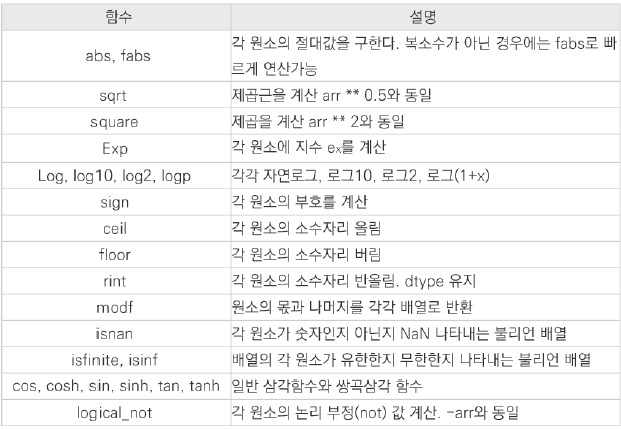

https://ameblo.jp/bluebird1012/entry-12408901465.html

**[이항 유니버설 함수]**

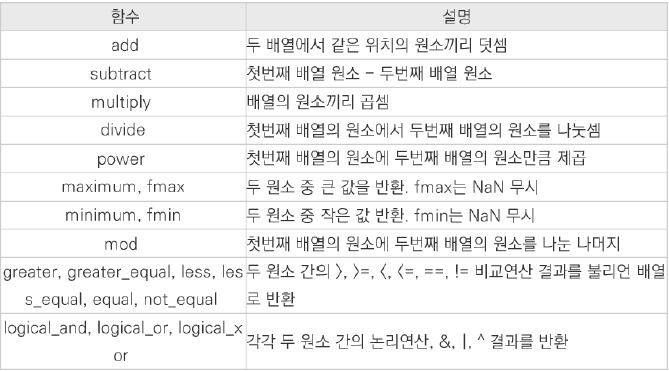

## **3.배열을 이용한 배열 지향 프로그래밍**

### **벡터화**
  - 배열 연산을 사용해서 반복문을 명시적으로 제거하는 기법

  -list를 사용할 때와 달리 numpy 배열을 이용했을 때 장점.


 - meshgrid(numpy에서 제공하는 함수):  두 개의 1차원 배열 받아 가능한 모든 (x,y) 짝을 만들 수 있는 2차원 배열 두 개 반환 

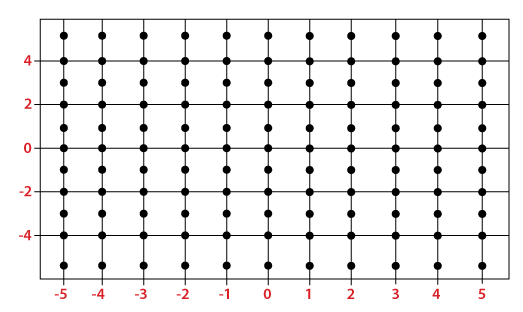

x축: 배열1

y축: 배열2

https://www.javatpoint.com/numpy-meshgrid

[meshgrid 예제]

meshgrid의 활용법: 등고선 그리기를 통한 decision boundary 등

In [61]:
import numpy as np

#range: 정수값만 생성 가능/ arange: 간격을 소수점으로 줄 수 있음. 실수값 생성 
points = np.arange(-5, 5, 0.01) # -5부터 4.99까지 0.01 씩 증가하는 값들의 배열
xs, ys = np.meshgrid(points, points)
print(xs)
print(ys)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]
[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]


In [62]:
z = np.sqrt(xs ** 2 + ys ** 2) #벡터화
z
'''
xs=-5, ys=-5일 때 z=7.07
이 방식으로 
(-4.99, -5)--> 7.06
(-4.98, -5)-->7.05
...
'''

array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

[matplotlib을 이용해서 이 2차원 배열 시각화]

matplotlib을 이용해서 이 2차원 배열 시각화


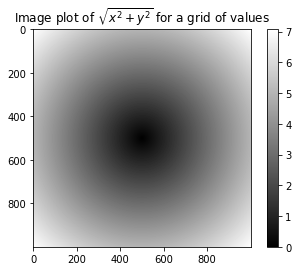

In [63]:
import matplotlib.pyplot as plt
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")
print("matplotlib을 이용해서 이 2차원 배열 시각화")

In [64]:
'''
colab에서 실행하기에 별로 유용한 코드는 아님. 
pycharm등에서 사용했을 때 따로 뜨는 이미지가 있음
'''
plt.draw()
plt.close('all')